2023-12-05 03:45:24.607 | INFO     | __main__:try_ccxt:43 - K线图: 1m, 
                         open      high       low     close     volume
time                                                                  
2023-12-05 02:56:00  41761.44  41763.50  41741.34  41741.34   41.05812
2023-12-05 02:57:00  41741.35  41741.35  41711.11  41717.98   42.82219
2023-12-05 02:58:00  41717.98  41725.90  41709.07  41709.08   24.28553
2023-12-05 02:59:00  41709.08  41725.89  41700.01  41725.89   10.49305
2023-12-05 03:00:00  41725.88  41748.47  41720.92  41748.47   15.17126
2023-12-05 03:01:00  41748.47  41762.36  41748.46  41757.49   22.31951
2023-12-05 03:02:00  41757.49  41783.37  41757.49  41779.09   45.00663
2023-12-05 03:03:00  41779.09  41829.05  41779.09  41829.04  110.91766
2023-12-05 03:04:00  41829.04  41829.05  41793.99  41793.99   69.30549
2023-12-05 03:05:00  41794.00  41805.24  41755.09  41762.61   41.69527
2023-12-05 03:06:00  41762.61  41762.62  41708.18  41716.86   40.97307
2023-12

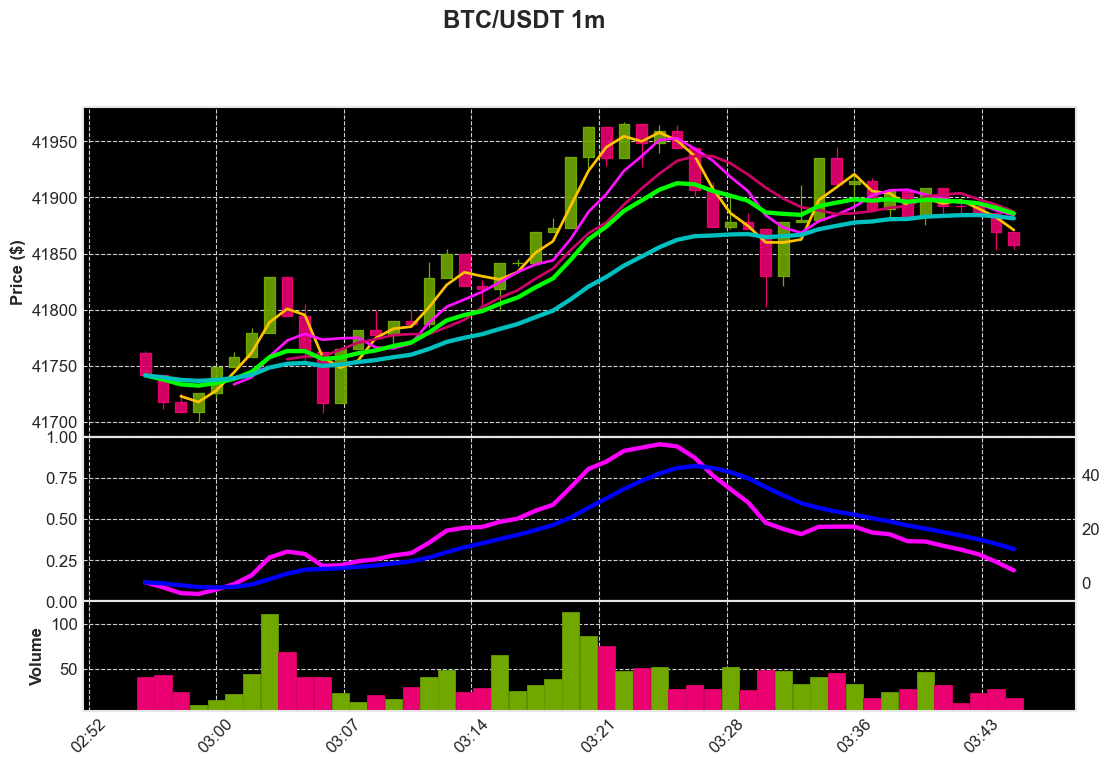

2023-12-05 03:45:25.127 | INFO     | __main__:try_ccxt:43 - K线图: 5m, 
                         open      high       low     close     volume
time                                                                  
2023-12-04 23:40:00  41248.48  41463.72  41208.33  41449.33  331.39022
2023-12-04 23:45:00  41449.33  41468.20  41330.06  41350.10  217.49064
2023-12-04 23:50:00  41350.10  41397.88  41244.46  41281.11  279.02228
2023-12-04 23:55:00  41281.10  41326.00  41241.17  41270.33  278.68753
2023-12-05 00:00:00  41270.32  41318.47  41179.55  41302.01  325.00107
2023-12-05 00:05:00  41302.02  41372.56  41302.01  41372.56  218.87633
2023-12-05 00:10:00  41372.56  41404.86  41340.18  41346.06  260.31802
2023-12-05 00:15:00  41346.06  41347.70  41262.00  41295.97  206.94585
2023-12-05 00:20:00  41295.97  41370.04  41227.92  41357.55  277.74236
2023-12-05 00:25:00  41357.55  41449.10  41354.87  41446.76  185.85508
2023-12-05 00:30:00  41446.76  41450.00  41403.22  41431.03  162.88875
2023-12

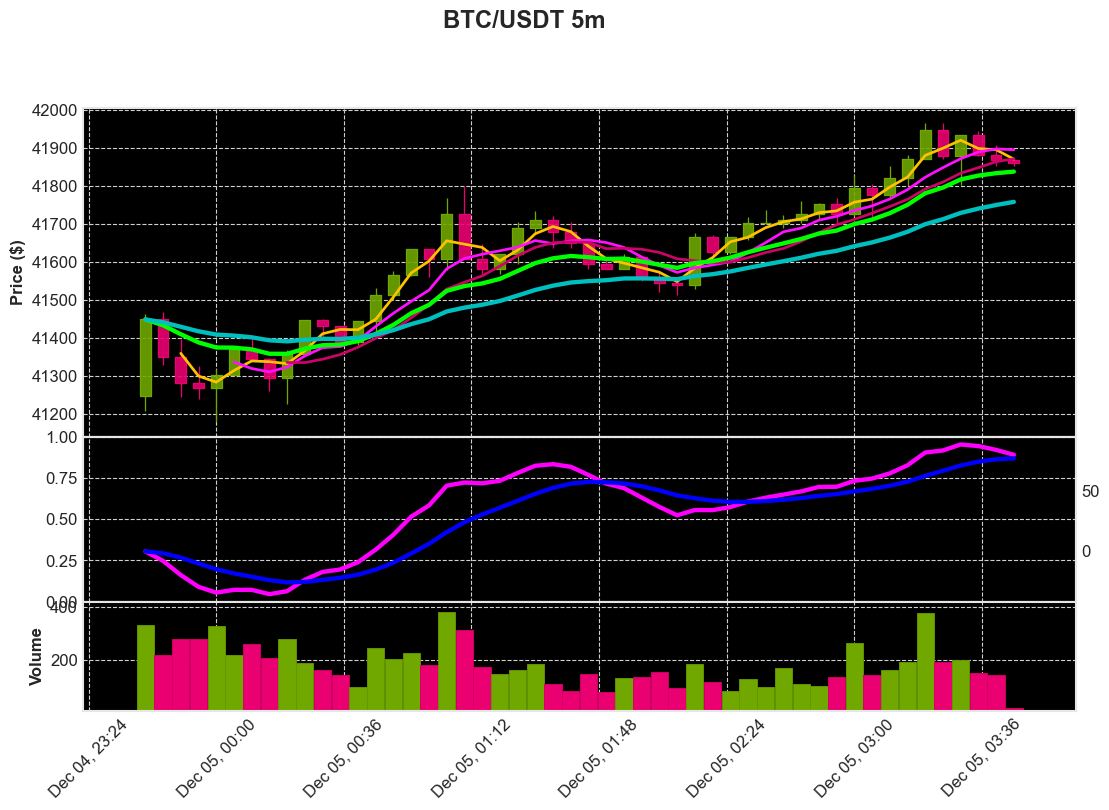

2023-12-05 03:45:25.563 | INFO     | __main__:try_ccxt:43 - K线图: 15m, 
                         open      high       low     close     volume
time                                                                  
2023-12-04 03:00:00  39543.28  39547.94  39517.97  39522.70  122.46448
2023-12-04 03:15:00  39522.70  39547.25  39430.01  39547.25  299.92067
2023-12-04 03:30:00  39547.24  39571.74  39544.43  39551.58   97.89760
2023-12-04 03:45:00  39551.58  39565.99  39511.17  39565.99  144.91470
2023-12-04 04:00:00  39565.99  39637.94  39562.90  39637.47  263.12594
...                       ...       ...       ...       ...        ...
2023-12-05 02:45:00  41711.25  41768.17  41700.01  41725.89  343.59958
2023-12-05 03:00:00  41725.88  41853.74  41708.18  41821.22  565.80343
2023-12-05 03:15:00  41821.23  41966.88  41798.99  41878.20  758.46533
2023-12-05 03:30:00  41878.20  41944.57  41802.67  41868.77  488.35582
2023-12-05 03:45:00  41868.78  41868.78  41854.04  41860.84   18.27315

[100 

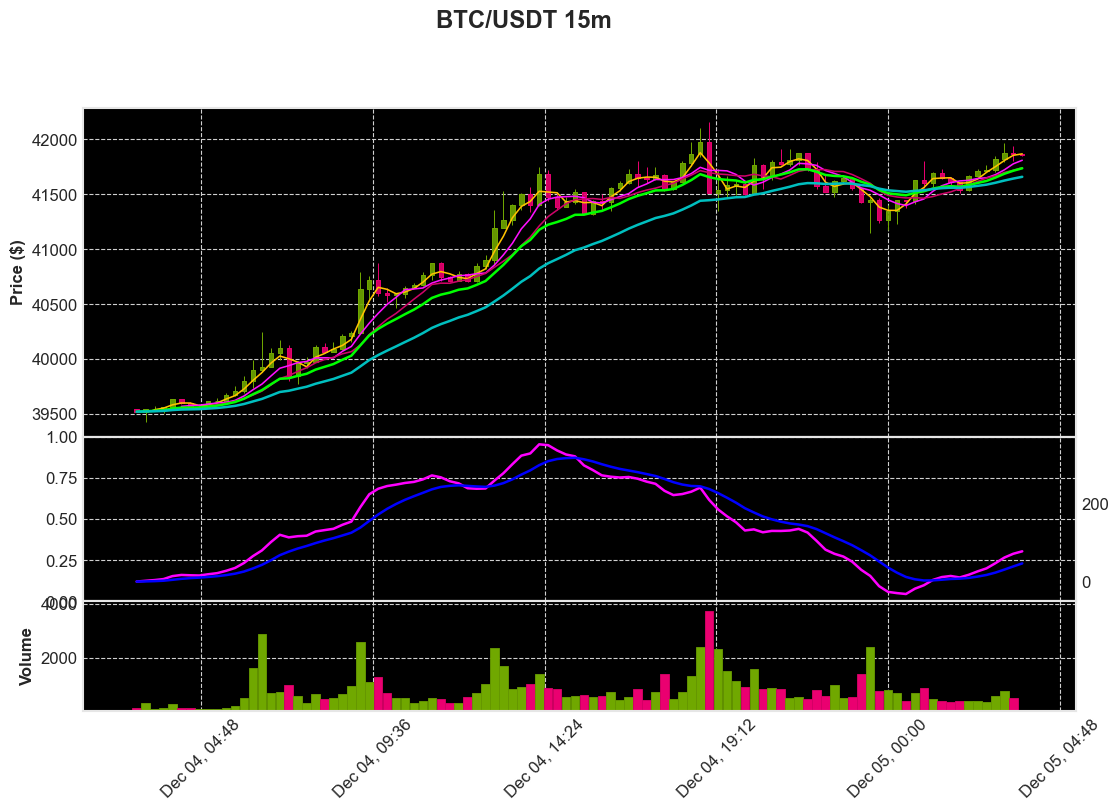

2023-12-05 03:45:26.016 | INFO     | __main__:try_ccxt:43 - K线图: 30m, 
                         open      high       low     close      volume
time                                                                   
2023-12-03 02:00:00  38795.09  38886.29  38789.13  38873.40   715.92116
2023-12-03 02:30:00  38873.41  38965.03  38775.00  38872.72  1358.12553
2023-12-03 03:00:00  38872.71  39705.00  38872.71  39342.43  5564.95386
2023-12-03 03:30:00  39342.42  39436.00  39200.00  39420.00  1456.97000
2023-12-03 04:00:00  39419.99  39454.36  39286.54  39388.01   984.10783
...                       ...       ...       ...       ...         ...
2023-12-05 01:30:00  41690.47  41734.61  41581.58  41614.66   735.19773
2023-12-05 02:00:00  41614.65  41677.73  41513.33  41664.96   765.96342
2023-12-05 02:30:00  41664.96  41768.17  41659.50  41725.89   736.18837
2023-12-05 03:00:00  41725.88  41966.88  41708.18  41878.20  1324.26876
2023-12-05 03:30:00  41878.20  41944.57  41802.67  41860.84   506

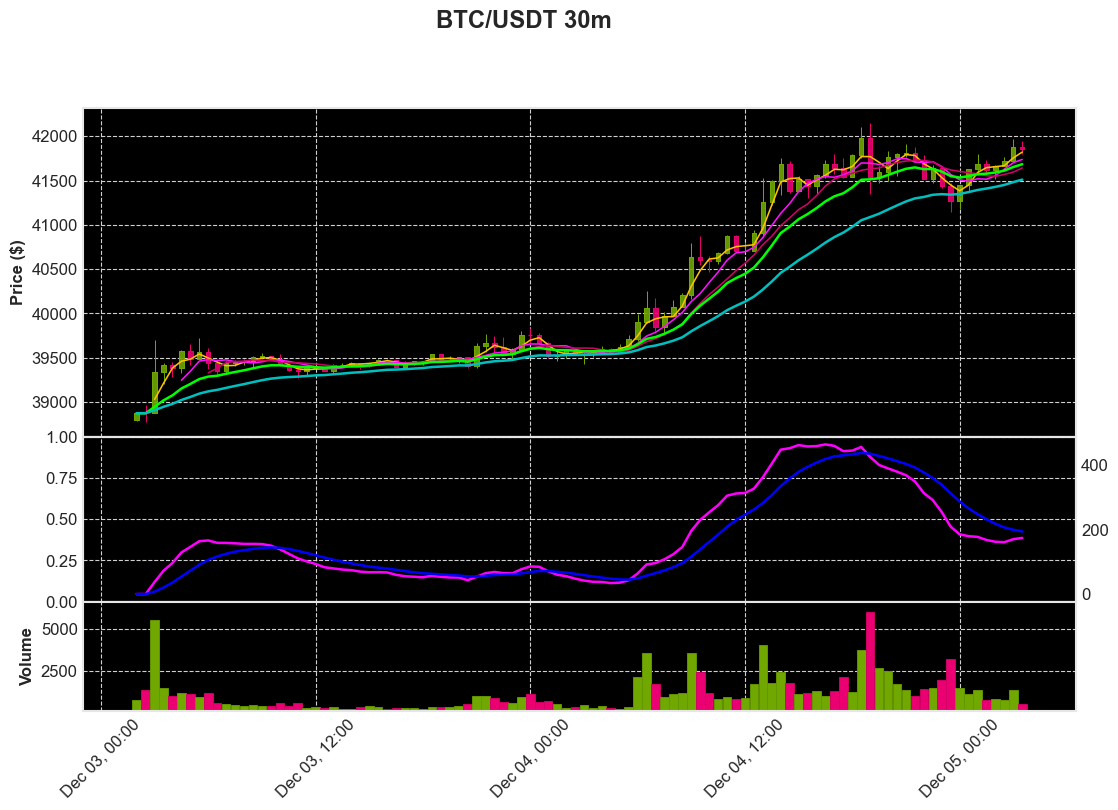

2023-12-05 03:45:26.466 | INFO     | __main__:try_ccxt:43 - K线图: 1h, 
                         open      high       low     close      volume
time                                                                   
2023-12-01 00:00:00  37619.85  37729.88  37535.00  37661.89  1019.35466
2023-12-01 01:00:00  37661.88  37757.77  37631.10  37740.86   718.76398
2023-12-01 02:00:00  37740.86  37807.37  37710.89  37739.36   724.36049
2023-12-01 03:00:00  37739.36  37796.00  37689.56  37749.34   569.39380
2023-12-01 04:00:00  37749.34  37765.00  37695.44  37730.94   618.30774
...                       ...       ...       ...       ...         ...
2023-12-04 23:00:00  41645.94  41659.80  41144.87  41270.33  5126.09680
2023-12-05 00:00:00  41270.32  41634.30  41179.55  41633.98  2546.37305
2023-12-05 01:00:00  41633.98  41800.00  41561.30  41614.66  2085.97983
2023-12-05 02:00:00  41614.65  41768.17  41513.33  41725.89  1502.15179
2023-12-05 03:00:00  41725.88  41966.88  41708.18  41860.84  1830.

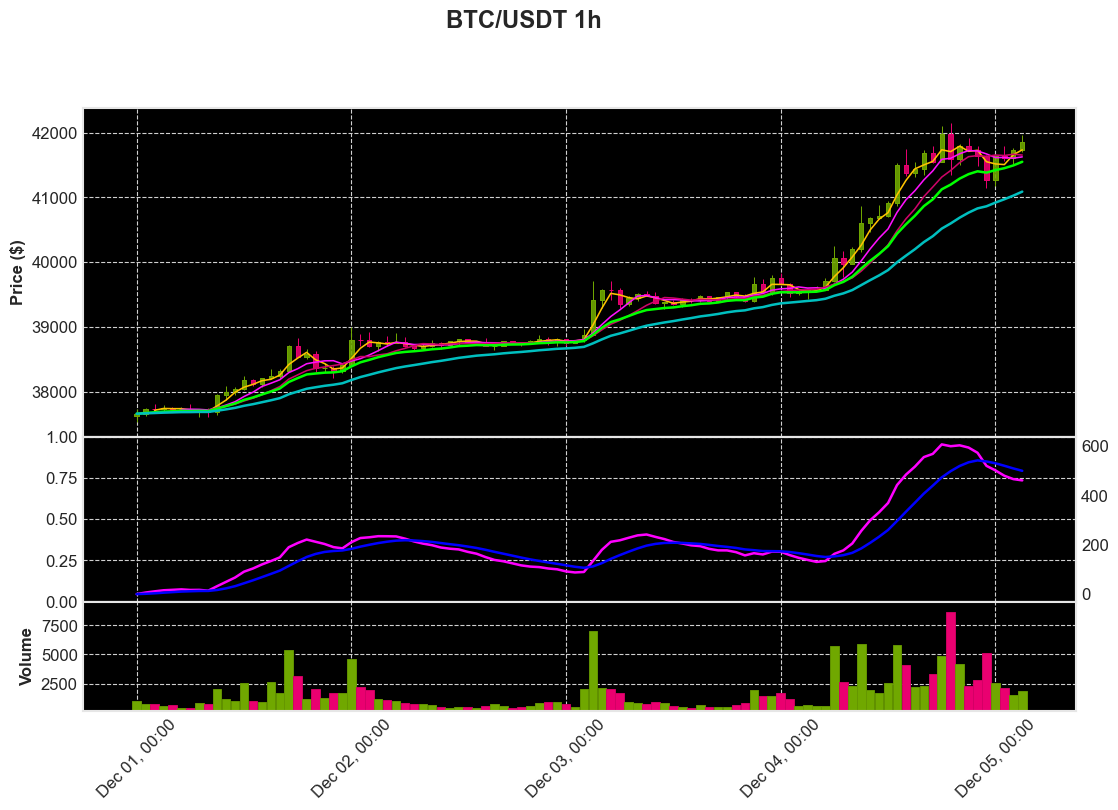

In [74]:
import ccxt
import mplfinance as mpf
import pandas as pd
from loguru import logger


def try_ccxt():
    exchange = ccxt.binance(config={
        'timeout': 200000,

        # use local http proxy
        'proxies': {
            'http': 'http://127.0.0.1:7890',
            'https': 'http://127.0.0.1:7890',
        }
    })

    ticker = exchange.fetch_ticker('BTC/USDT')
    df = pd.DataFrame(ticker)
    # logger.info(df)

    for (ts, limit) in [
        ('1m', 50),
        ('5m', 50),  # 5分钟, 100 条
        ('15m', 100),
        ('30m', 100),
        ('1h', 100)
    ]:
        df = pd.DataFrame(
            exchange.fetch_ohlcv(
                'BTC/USDT',
                timeframe=ts,
                limit=limit
            ),
            columns=['time', 'open', 'high', 'low', 'close', 'volume']
        )
        # 绘制图表
        df.set_index('time', inplace=True)
        # 时间改为北京时间
        df.index = pd.to_datetime(df.index, unit='ms') + pd.Timedelta(hours=8)
        # 画出开盘/收盘价格对比图
        # df[['open', 'close', 'high', 'low']].plot()
        logger.info(f'K线图: {ts}, \n{df}')

        s = mpf.make_mpf_style(
            # base_mpl_style=['dark_background',],
            base_mpf_style='binance',  # 'yahoo', 'charles', 'nightclouds', binance
            facecolor='#000000',  # 背景色: 白色
            # edgecolor='#505050',  # 边框色: 橘色
        )

        # MACD 指标
        exp12 = df['close'].ewm(span=12, adjust=False).mean()
        exp26 = df['close'].ewm(span=26, adjust=False).mean()
        macd = exp12 - exp26
        signal = macd.ewm(span=9, adjust=False).mean()
        histogram = macd - signal

        aps = [
            # 图 1:
            # mpf.make_addplot(df['high'], panel=0, color='g', secondary_y=False),
            # mpf.make_addplot(df['low'], panel=0, color='r', secondary_y=False),
            mpf.make_addplot(exp12, color='lime'),
            mpf.make_addplot(exp26, color='c'),

            # 图 2:
            # mpf.make_addplot(histogram, type='bar', panel=1, alpha=1, secondary_y=False),
            mpf.make_addplot(macd, panel=1, color='fuchsia', secondary_y=True),
            mpf.make_addplot(signal, panel=1, color='b', secondary_y=True),
        ]

        # K线图
        mpf.plot(
            df,
            addplot=aps,

            type='candle',
            style=s,  # style='yahoo', 'charles', 'nightclouds', binance
            ylabel='Price ($)',
            mav=(3, 6, 9),
            volume=True,
            volume_panel=2, panel_ratios=(6, 3, 2),
            show_nontrading=True,
            title=f'BTC/USDT {ts}',
            figscale=1.5,
            figratio=(8, 5),

        )
        mpf.show()

    # 5m K线

    # plt.title('BTC/USDT')
    # plt.show()


try_ccxt()